# EDA and cleaning

In [1]:
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

data_df = pd.read_csv("data/emotions.csv")
data_df.head(20)


,text,label
0,i feel so pissed off over an old friend and so...,anger
1,ive found it has made a huge difference especi...,anger
2,i also feel it is unfortunate that nearly all ...,sadness
3,i feel petty a href http clairee,anger
4,i used to believe that a feeling like fear was...,sadness
5,i sit in the same hostel i did nearly two mont...,sadness
6,i want to just drown myself in the excitement ...,sadness
7,i could easily describe this transformed feeli...,sadness
8,i fought i could feel myself trusting this man...,joy
9,i the ultimate place to restore the peace to f...,joy


In [2]:
# integer encoding

label_encoder = LabelEncoder()
data_df["label"] = label_encoder.fit_transform(data_df["label"])

In [3]:
# We note that text for links are included and should be removed
import re


def clean_string_in_series(series, patterns):
    # Compile the regex pattern
    regex = re.compile(patterns)

    # Apply the regex substitution to each element of the series
    return series.apply(lambda x: regex.sub("", x) if isinstance(x, str) else x)


# setting pattern and running function
pattern = r"(a href.*|href.*|http.*)"
data_df["text"] = clean_string_in_series(data_df["text"], pattern)

data_df

,text,label
0,i feel so pissed off over an old friend and so...,0
1,ive found it has made a huge difference especi...,0
2,i also feel it is unfortunate that nearly all ...,4
3,i feel petty,0
4,i used to believe that a feeling like fear was...,4
...,...,...
19995,i was i might be buying stuff from there but i...,2
19996,i like sonam deepika and genelia who i feel ar...,2
19997,i feel pathetic that i can hardly go a whole d...,4
19998,id have spent more time with her on reading i ...,4


In [4]:
# Now that the data is cleaned we do a train, test, val-split

X_train, X_test, y_train, y_test = train_test_split(data_df["text"], data_df["label"], test_size=0.1, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((15300,), (15300,), (2700,), (2700,), (2000,), (2000,))

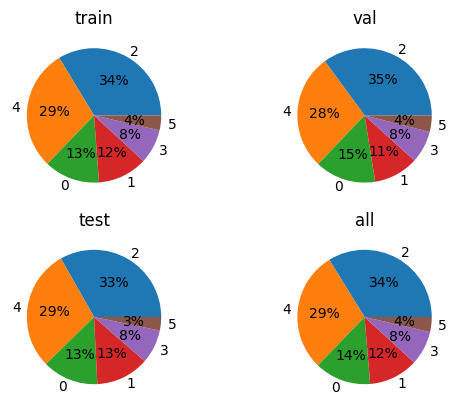

In [5]:
# plotting splits

s_1 = y_train.value_counts()
s_2 = y_val.value_counts()
s_3 = y_test.value_counts()
s_4 = data_df["label"].value_counts()

plt.subplot(2, 2, 1)
plt.title("train")
plt.pie(s_1, labels=s_1.index, autopct='%1.0f%%');

plt.subplot(2, 2, 2)
plt.title("val")
plt.pie(s_2, labels=s_2.index, autopct='%1.0f%%');

plt.subplot(2, 2, 3)
plt.title("test")
plt.pie(s_3, labels=s_3.index, autopct='%1.0f%%');

plt.subplot(2, 2, 4)
plt.title("all")
plt.pie(s_4, labels=s_4.index, autopct='%1.0f%%');

# We note that the data is fairly unbalanced, with joy and sadness being the most common and surprise and love being the least common. The balance between the splits is acceptable though

## Vectorization

In [6]:
from keras.layers import TextVectorization

VOCAB_SIZE = 1000

encoder = keras.layers.TextVectorization(max_tokens=VOCAB_SIZE, output_mode="int", pad_to_max_tokens=True)
encoder.adapt(X_train)
X_train_tokenized = encoder(X_train)


In [9]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

EMBEDDING_DIM = 128  # Size of the word embeddings
RNN_UNITS = 64       # Number of units in RNN layer

model = Sequential([
    # Embedding layer
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=encoder.output_sequence_length),
    
    # RNN layer
    SimpleRNN(RNN_UNITS, return_sequences=False),  # Set return_sequences=True if adding more RNN layers
    
    # Dense layer for classification
    Dense(6, activation='softmax')  # Assuming 6 classes for the sentiment
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


AttributeError: 'TextVectorization' object has no attribute 'output_sequence_length'

In [ ]:
model.summary()